## Exploring Prototypical Examples with ProtoDash

*Disclaimer: This work is not yet complete. Within the business context of Housing Insecurity, we may wish to find examples of prototypical areas that have high evications rates whose attributes differ from those that have low eviction rates. This could be used to identify reasons why the rates are higher or identify other areas also at risk of experiencing similar eviction rates. At the moment, this document simply finds examples that best reflect the underlying distribution of the high eviction areas but doesn't consider whether they are also examples that best reflect the underlying distribution of the total data set.*

For an introduction to ProtoDash, please see: [An Introduction to ProtoDash - An Algorithm to Better Understand Datasets and Machine Learning Models](https://towardsdatascience.com/an-introduction-to-protodash-an-algorithm-to-better-understand-datasets-and-machine-learning-613c24b23719)

The library used for this work is [AIX360](https://github.com/Trusted-AI/AIX360).

Import required libraries and set the output of pandas to display all columns.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot

In [3]:
from scipy.spatial.distance import cdist

In [4]:
from aix360.algorithms.protodash import ProtodashExplainer

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
pd.set_option('display.max_columns', None)

### Read in NYC Processed Eviction Data

This data has been processed to summarize the number of eviction for years 2017 to 2019 and corresponding attributes about each area, such as the number of households, the median property value, the proportion of the population that is white, etc.

In [7]:
df_proc = pd.read_csv("../../data/processed/nyc_processed_2017_to_2019_20210225.csv")

We view the first few rows.

In [8]:
df_proc.head()

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state
0,36085013204,1790,422,1368,798,1411,84866,493400,2396,95.4,0.0,9.6,0.0,1.3,0.0,0.6,2.7,-888888888,382,27,260,3443,244,1172,1307,672,115,0,23.575419,76.424581,44.581006,31.843575,55,4.6,2.817209,9.0,3.0,2.0,3.555556,0.562500,6.0,10.666667,0.562500,1.0,1.777778,0.562500,0.844547,0.710900,0.841753,36085,Staten Island,New York
1,36085013800,2369,441,1928,1030,1185,82361,561100,2404,98.8,0.5,6.2,0.0,0.0,0.0,0.7,0.0,-888888888,585,67,313,4553,117,1388,1581,681,92,0,18.615450,81.384550,43.478261,37.906290,55,1.2,0.773281,2.0,2.0,0.0,0.000000,0.000000,2.0,6.000000,0.333333,0.0,0.000000,0.000000,0.844547,0.453515,0.536992,36085,Staten Island,New York
2,36085014700,1341,241,1100,707,1220,84310,463800,2406,94.9,2.2,4.5,0.0,3.0,0.0,0.0,0.0,-888888888,366,30,155,2492,59,442,1023,435,163,0,17.971663,82.028337,52.721849,29.306488,63,5.1,4.076246,4.0,2.0,3.0,5.000000,0.600000,0.0,0.000000,0.000000,1.0,1.666667,0.600000,0.844547,0.829876,0.982628,36085,Staten Island,New York
3,36085019700,712,99,613,366,1384,98167,449800,2297,95.4,1.0,8.3,0.0,1.3,0.0,0.0,2.4,-888888888,219,18,74,1283,49,158,622,162,18,0,13.904494,86.095506,51.404494,34.691011,82,4.6,3.532009,1.0,1.0,1.0,1.500000,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.844547,1.010101,1.196027,36085,Staten Island,New York
4,36085020804,1988,179,1809,1270,1175,95417,602200,2820,92.6,0.0,3.4,0.0,4.5,0.0,1.0,2.0,-888888888,535,29,147,4142,79,1027,1754,556,67,8,9.004024,90.995976,63.883300,27.112676,42,7.4,2.940674,6.0,2.0,2.0,4.400000,0.454545,3.0,6.600000,0.454545,1.0,2.200000,0.454545,0.844547,1.117318,1.322979,36085,Staten Island,New York


We also count the number of rows.

In [9]:
len(df_proc)

2167

### View Borough Distributions

We expect that the eviction rates across boroughs will differ. To explore this we are plotting a box plot for total evictions by borough. The green line indicates the median value for total evictions, the box itself indicates the interquartile range (IQR) which includes Q1 (25th percentile) for the bottom of the box and Q3 (75th percentile) for the top of the box. The two extra lines indicate an expected range for additional points and any circles outside of this are outliers.

<AxesSubplot:>

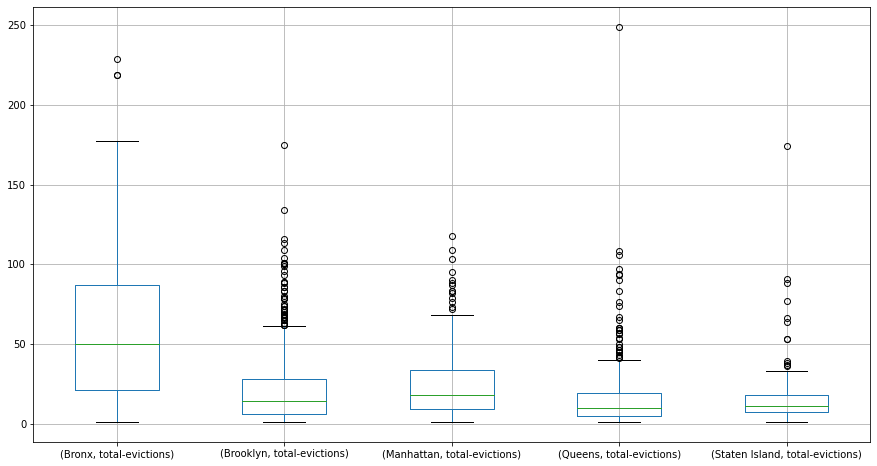

In [10]:
df_proc[['total-evictions', 'county']].groupby('county').boxplot(subplots=False, figsize=(15,8))

Bronx appears to have a substantially higher median for the number of evictions than the other boroughs, and the range of statistically expected values is particularly large too. Whilst higher eviction numbers across the other boroughs are unexpected and considered outliers. 

We can explore this further with histograms.

[]

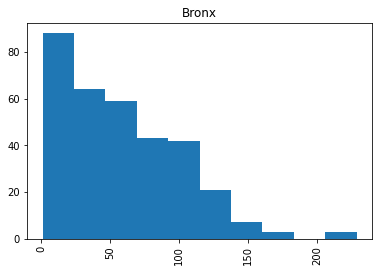

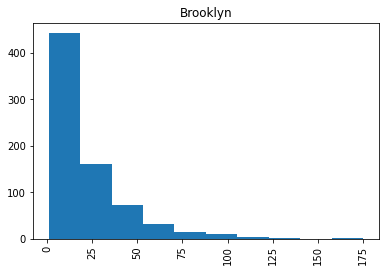

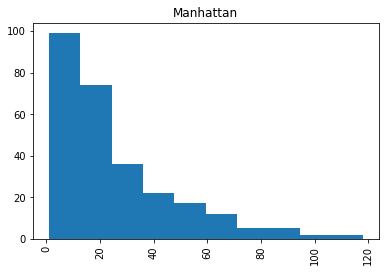

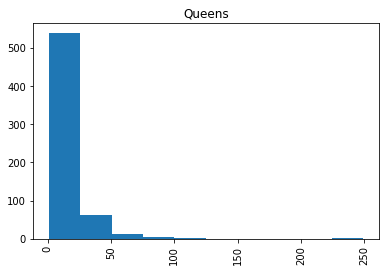

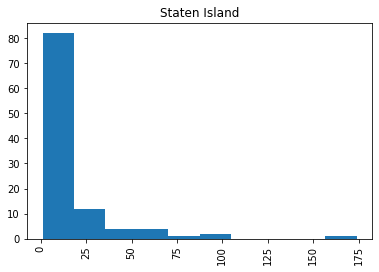

In [11]:
df_proc[['total-evictions', 'county']].groupby('county').hist('total-evictions', by='county')
pyplot.plot()

Bronx's data appears to follow a trend of a half-normal distribution (the data appears to be normally distributed but cut at the mean point), whilst the remaining boroughs are more skewed.

Finally, we can count the number of datapoints for each borough.

In [12]:
df_proc[['census_tract_GEOID', 'county']].groupby('county').count()

,census_tract_GEOID
county,
Bronx,339
Brooklyn,761
Manhattan,288
Queens,669
Staten Island,110


### Data Cleansing

We can check the data for examples containing null values.

In [13]:
df_proc[df_proc.isna().any(axis=1)]

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state
62,36085990100,0,0,0,0,-666666666,-666666666,-666666666,-666666666,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-888888888,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,666668687,666666766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36085,Staten Island,New York
66,36085013201,584,72,512,273,1397,104444,530900,2598,95.7,0.9,5.0,0.0,3.4,0.0,0.0,0.0,-888888888,169,11,99,1141,25,313,416,238,15,0,12.328767,87.671233,46.746575,40.924658,60,4.3,6.206460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36085,Staten Island,New York
69,36085001800,182,182,0,0,1472,67000,-666666666,-666666666,78.0,17.6,10.4,0.0,0.0,0.0,4.4,0.0,-888888888,102,4,0,326,18,45,91,31,78,0,100.000000,0.000000,0.000000,0.000000,39,22.0,0.638298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36085,Staten Island,New York
95,36085015400,0,0,0,0,-666666666,-666666666,-666666666,-666666666,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-888888888,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,666668687,666666766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36085,Staten Island,New York
111,36061004500,395,228,167,100,1161,140813,2000001,4001,72.7,0.0,1.3,0.0,20.8,0.0,6.6,0.0,-888888888,113,0,40,741,104,283,24,294,106,0,57.721519,42.278481,25.316456,16.962025,82,27.3,3.218884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36061,Manhattan,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,36005031900,0,0,0,0,-666666666,-666666666,-666666666,-666666666,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-888888888,0,0,0,79,4,157,30,19,0,0,NaN,NaN,NaN,NaN,666668687,666666766.0,9.633028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36005,Bronx,New York
1954,36005002400,26,26,0,0,-666666666,-666666666,-666666666,-666666666,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,-888888888,26,0,0,98,65,0,0,98,0,0,100.000000,0.000000,0.000000,0.000000,666668687,100.0,21.138211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36005,Bronx,New York
2005,36005016300,0,0,0,0,-666666666,-666666666,-666666666,-666666666,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-888888888,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,666668687,666666766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36005,Bronx,New York
2009,36005024900,0,0,0,0,-666666666,-666666666,-666666666,-666666666,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-888888888,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,666668687,666666766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844547,NaN,NaN,36005

There are 101 rows with null values. It appears all these examples have null values for `total-evictions` which is our main column of interest. We can confirm if that is the case across all over the 101 rows.

In [14]:
len(df_proc[df_proc['total-evictions'].isna()])

98

There are an additional 3 rows that also have a null value somewhere else but we will drop all nulls as this is unlikely to impact our exploration since it only accounts for 0.1% of our data (3/2167).

In [15]:
df_proc.dropna(inplace=True)

### Preprocessing

We wish to capture all columns we want to include in our prototype analysis. These are all the numerical columns except those that reference `eviction`. The GEOID columns will also be excluded in the analysis.

In [16]:
num_cols = []
ignore_cols = ['census_tract_GEOID', 'county_GEOID']
for c in list(df_proc.columns):
    if c in ignore_cols:
        continue
    if 'eviction' in c:
        continue
    if df_proc[c].dtype in ['float','int64']:
        num_cols.append(c)

There are a lot of columns that have placeholder values, some are negative, i.e. -666666666 (`median-gross-rent` and `pct-white`), whilst others are large and positive, i.e. ~666666666 (`median-house-age` and `pct-non-white`).

We will replace these values with 0, however, an alternative approach such as providing the median value, may be worth exploring.

In [17]:
num = df_proc._get_numeric_data()
num[num < 0] = 0
num[num > 666666000] = 0

## Bronx

We will start with Bronx data and replicate the process across the remaining boroughs.

First we subset our data to the rows of interest.

In [18]:
bronx_df = df_proc[df_proc['county'] == 'Bronx']

We're interested in exploring examples that our in our top 10 percentile for total eviction rates. We calculate the threshold to subset our data.

In [19]:
p = 90
p_thresh = np.nanpercentile(bronx_df['total-evictions'], p)

In [20]:
print(p_thresh)

116.10000000000002


For areas with total eviction values greater than 116, they will be included in our `upper_p` dataset, the remaining in `rest`.

In [21]:
upper_p = bronx_df[bronx_df['total-evictions'] > p_thresh]
rest = bronx_df[bronx_df['total-evictions'] <= p_thresh]
print(len(upper_p), len(rest))

33 297


There are 33 examples in our dataset of interest (which is 10% of the total 330 examples for Bronx).

We capture the columns we're interested in and convert to numpy read for scaling and our algorithm.

In [22]:
data = bronx_df[num_cols].to_numpy()

We create and fit a scaler to change the values in our data to range between 0 and 1.

In [23]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

We then transform our `upper` and `rest` subsets.

In [24]:
data_upper = scaler.transform(upper_p[num_cols].to_numpy())
data_rest = scaler.transform(rest[num_cols].to_numpy())

#### Creating ProtoTypes

The method we are using is called `explain` and details are below. We will be passing the same dataset (`data_upper`) twice as we wish to use it to discover the underlying distribution as well as capture prototypes from it that best represent that distribution.

```
explain(X, Y, m, kernelType='other', sigma=2)
    X (double 2d array) – Dataset to select prototypical explanations from.
    Y (double 2d array) – Dataset you want to explain.
    m (int) – Number of prototypes
    kernelType (str) – Type of kernel (viz. ‘Gaussian’, / ‘other’)
    sigma (double) – width of kernel
```

Similar to clustering algorithms, the number of prototypes to choose can be selected based upon how each additional selection improves the explanation of the data (or the optimization metric of interest). We will first create explanations for 10 examples, capturing the `m_vals` output which is an array for the optimization value calulation for 1, 2, ... 10 examples.

In [25]:
explainer = ProtodashExplainer()

# call protodash explainer
# S contains indices of the selected prototypes
# W contains importance weights associated with the selected prototypes 
(W, S, m_vals) = explainer.explain(data_upper, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


We plot the `m_vals` and look for point where it begins to plateau, indicating that adding more prototypes doesn't provide any substantial benefit to capturing the underlying distribution of the data. This method is called `The Elbow Curve`.

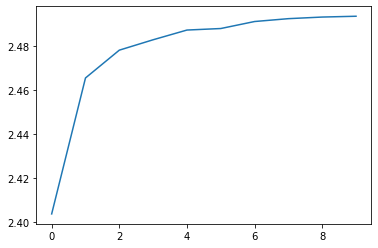

In [26]:
pyplot.plot(m_vals)

We will decide to create 3 prototypes as this seems to be the turning point.

In [27]:
(W, S, _) = explainer.explain(data_upper, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


We then wish to look at our prototypes, as well as their weights which can be inferred as the proportion of this dataset the prototype represents.

This is where a subject matter expert may want to explore the examples and see if they believe them to be representative and how they could use this information.

In [28]:
# Display the prototypes along with their computed weights
inc_prototypes = upper_p.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
2150,0,1839,1698,141,63,1162,31926,222800,1082,20.5,32.6,59.5,1.8,4.8,0.0,3.0,37.2,0,431,287,196,3114,1082,2877,208,1518,173,0,92.332790,7.667210,3.425775,4.241436,82,79.5,14.613583,121.0,40.333333,50.0,173.913043,0.28750,36.0,125.217391,0.28750,35.0,121.739130,0.28750,0.844547,2.375344,2.812564,36005,Bronx,New York,0.53
2066,0,3219,3060,159,98,921,21587,340800,2630,13.8,27.6,66.4,0.0,0.4,0.0,2.1,56.2,0,1189,845,290,5176,1868,5331,401,1915,135,15,95.060578,4.939422,3.044424,1.894998,69,86.2,16.179275,219.0,73.000000,86.0,233.695652,0.36800,71.0,192.934783,0.36800,62.0,168.478261,0.36800,0.844547,2.385621,2.824733,36005,Bronx,New York,0.30
1835,0,2362,2292,70,20,1126,29273,0,0,10.3,39.9,56.9,0.5,3.3,0.0,2.7,43.2,0,816,409,91,4562,2933,5960,302,1928,54,0,97.036410,2.963590,0.846740,2.116850,82,89.7,10.924171,140.0,46.666667,58.0,170.864865,0.33945,51.0,150.243243,0.33945,31.0,91.324324,0.33945,0.844547,2.036067,2.410839,36005,Bronx,New York,0.17


#### Using Prototypes for Clustering

We can use these prototypes as the centers of clusters and assign labels to the remaining examples indicating which cluster they belong to.

In [29]:
centroids = data_upper[S]

Capturing the closest centroid.

In [30]:
clusters = np.argmin(cdist(data_upper,centroids),1)

Assigning a new column to the data to indicate which cluster it is in.

In [31]:
upper_p["Cluster"] = clusters

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We may wish to then explore what the mean and standard deviation for `total-evictions` are across these clusters. Further exploration of the other features would be interest too.

In [32]:
for i in range(0,len(centroids)):
    clust = upper_p[upper_p["Cluster"] == i]
    print("For cluster ", i, " there are ", len(clust), " examples")
    print("The mean and standard deviation for these clusters are ",clust["total-evictions"].mean(), " and ", clust["total-evictions"].std(), " respectively")
    print()

For cluster  0  there are  18  examples
The mean and standard deviation for these clusters are  132.44444444444446  and  16.074174472342904  respectively

For cluster  1  there are  7  examples
The mean and standard deviation for these clusters are  157.71428571428572  and  32.04535476328452  respectively

For cluster  2  there are  8  examples
The mean and standard deviation for these clusters are  154.75  and  43.053952863155985  respectively



#### Examples in Rest of Data Similar to Upper Percentile

Another way ProtoDash can be used is to provide two different datasets to the algorithm. The first being the data you wish to extract prototypes from and the second the dataset which captures the distribution you are interested in. In our example we are asking `ProtodashExplainer` to capture the underlying distribution of `data_upper` and searching for examples in `data_rest` that are similar.

We again must explore the best option for the number of prototypes (i.e. our `m` value).

In [33]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_rest, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


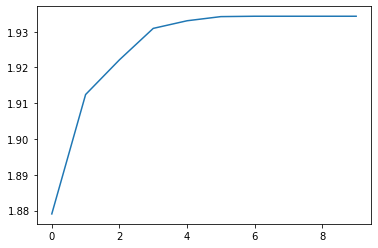

In [34]:
pyplot.plot(m_vals)

We again select `m` to be 3.

In [35]:
(W, S, _) = explainer.explain(data_rest, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


We now look at the examples it has chosen from the `rest` data set that best captures the distribution of `upper`.

In [36]:
# Display the prototypes along with their computed weights
inc_prototypes = rest.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
1861,0,1410,1208,202,148,1134,38375,362700,2479,12.6,59.9,35.3,2.5,2.8,0.0,5.4,16.9,0,368,245,266,2384,627,1286,353,844,72,0,85.673759,14.326241,10.496454,3.829787,75,87.4,14.158785,108.0,36.000000,43.0,93.000000,0.462366,40.0,86.511628,0.462366,25.0,54.069767,0.462366,0.844547,2.980132,3.528674,36005,Bronx,New York,0.72
1837,0,831,567,264,181,1207,51850,429000,2798,45.0,10.2,48.5,0.0,3.2,0.0,2.0,39.5,0,352,97,20,1628,720,1474,372,575,48,5,68.231047,31.768953,21.780987,9.987966,82,55.0,12.879349,25.0,8.333333,10.0,24.545455,0.407407,11.0,27.000000,0.407407,4.0,9.818182,0.407407,0.844547,1.469724,1.740250,36005,Bronx,New York,0.09
1842,0,1383,859,524,182,1275,39375,362600,2230,37.7,38.8,59.0,0.0,0.0,0.0,4.1,19.3,0,345,169,182,2470,220,1780,651,730,62,0,62.111352,37.888648,13.159798,24.728850,52,62.3,8.213996,30.0,10.000000,15.0,29.117647,0.515152,9.0,17.470588,0.515152,6.0,11.647059,0.515152,0.844547,1.164144,1.378424,36005,Bronx,New York,0.19


Interestingly, the total eviction rate for the most similar example is pretty high (close to our threshold), whilst the other two are not.

As per the note at the beginning of the notebook, more consideration into removing examples that are general across all the dataset and focusing on those that capture the remaining `upper` examples to highlight attributes that might be contributing to high eviction rates. One method of doing this could be swapping the order of data going into this algorithm, passing `rest` as the dataset of interest and finding prototypes within `upper`. Then removing those most similar to these before finding the prototypes again on `upper`. To do this, we would probably want to increase the number of examples within upper by lowering the percentile boundary.

## Brooklyn

Repeating for Brooklyn data, please refer to notes in Bronx to further understand the code.

In [37]:
brooklyn_df = df_proc[df_proc['county'] == 'Brooklyn']

In [38]:
p = 90
p_thresh = np.nanpercentile(brooklyn_df['total-evictions'], p)

In [39]:
print(p_thresh)

49.0


As seen in our plots earlier, the boundary is much lower for Brooklyn than Bronx.

In [40]:
upper_p = brooklyn_df[brooklyn_df['total-evictions'] > p_thresh]
rest = brooklyn_df[brooklyn_df['total-evictions'] <= p_thresh]
print(len(upper_p), len(rest))

73 661


In [41]:
data = brooklyn_df[num_cols].to_numpy()

In [42]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [43]:
data_upper = scaler.transform(upper_p[num_cols].to_numpy())
data_rest = scaler.transform(rest[num_cols].to_numpy())

In [44]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_upper, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


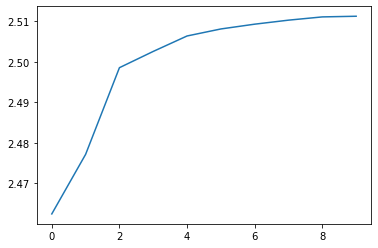

In [45]:
pyplot.plot(m_vals)

Similar to Bronx, we are choosing to find 3 prototypes.

In [46]:
(W, S, _) = explainer.explain(data_upper, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [47]:
# Display the prototypes along with their computed weights
inc_prototypes = upper_p.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
1516,0,1757,1441,316,182,1234,41443,587300,2641,3.3,91.5,4.7,0.0,0.7,0.0,2.7,1.8,0,651,304,153,3300,1177,1677,237,1653,229,0,82.014798,17.985202,10.358566,7.626636,82,96.7,15.399572,89.0,29.666667,36.0,206.078740,0.174691,27.0,154.559055,0.174691,26.0,148.834646,0.174691,0.844547,2.058755,2.437703,36047,Brooklyn,New York,0.68
1339,0,3356,3324,32,16,718,20305,0,0,40.1,54.4,14.9,0.5,0.6,0.0,1.8,2.5,0,522,337,1038,4631,394,2389,532,1258,32,0,99.046484,0.953516,0.476758,0.476758,47,59.9,7.062818,96.0,32.000000,49.0,1072.302326,0.045696,21.0,459.558140,0.045696,26.0,568.976744,0.045696,0.844547,0.962696,1.139895,36047,Brooklyn,New York,0.10
1551,0,986,874,112,58,1448,27596,494600,2363,20.1,45.6,54.6,1.5,1.4,0.0,0.0,31.3,0,426,209,98,1836,472,1415,136,725,125,0,88.640974,11.359026,5.882353,5.476673,72,79.9,10.686016,52.0,17.333333,19.0,53.437500,0.355556,22.0,61.875000,0.355556,11.0,30.937500,0.355556,0.844547,1.983219,2.348263,36047,Brooklyn,New York,0.22


#### Using Prototypes for Clustering

In [48]:
centroids = data_upper[S]

In [49]:
clusters = np.argmin(cdist(data_upper,centroids),1)

In [50]:
upper_p["Cluster"] = clusters

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
for i in range(0,len(centroids)):
    clust = upper_p[upper_p["Cluster"] == i]
    print("For cluster ", i, " there are ", len(clust), " examples")
    print("The mean and standard deviation for these clusters are ",clust["total-evictions"].mean(), " and ", clust["total-evictions"].std(), " respectively")
    print()

For cluster  0  there are  58  examples
The mean and standard deviation for these clusters are  74.74137931034483  and  24.06100459090964  respectively

For cluster  1  there are  4  examples
The mean and standard deviation for these clusters are  76.5  and  16.176114078067904  respectively

For cluster  2  there are  11  examples
The mean and standard deviation for these clusters are  62.54545454545455  and  9.490665270292029  respectively



#### Examples in Rest of Data Similar to Upper Percentile

In [52]:
data_rest.shape, data_upper.shape

((661, 34), (73, 34))

In [53]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_rest, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


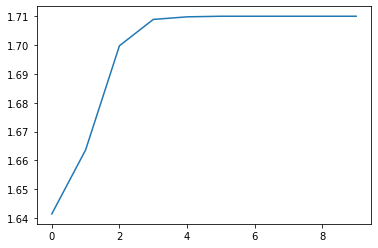

In [54]:
pyplot.plot(m_vals)

In [55]:
(W, S, _) = explainer.explain(data_rest, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [56]:
# Display the prototypes along with their computed weights
inc_prototypes = rest.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
1105,0,2382,2199,183,127,440,18129,453900,0,71.2,18.3,29.1,0.0,0.0,0.0,0.9,9.5,0,855,121,307,3913,113,5383,324,497,34,22,92.317380,7.682620,5.331654,2.350966,50,28.8,4.298811,24.0,8.0,12.0,25.132075,0.477477,6.0,12.566038,0.477477,6.0,12.566038,0.477477,0.844547,0.363802,0.430765,36047,Brooklyn,New York,0.49
1082,0,1412,809,603,283,1285,62463,578300,3203,89.9,3.0,5.7,0.0,4.1,0.0,2.1,0.8,0,457,90,227,2472,403,1934,532,770,91,0,57.294618,42.705382,20.042493,22.662890,68,10.1,10.325938,15.0,5.0,2.0,9.500000,0.210526,6.0,28.500000,0.210526,7.0,33.250000,0.210526,0.844547,0.618047,0.731809,36047,Brooklyn,New York,0.10
1069,0,657,182,475,254,1301,92292,705600,2895,73.2,0.0,4.9,0.0,26.8,0.0,0.0,0.0,0,206,26,58,1440,196,861,310,406,66,0,27.701674,72.298326,38.660578,33.637747,82,26.8,2.724121,1.0,1.0,1.0,2.666667,0.375000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.844547,0.549451,0.650586,36047,Brooklyn,New York,0.41


## Queens

In [57]:
queens_df = df_proc[df_proc['county'] == 'Queens']

In [58]:
p = 90
p_thresh = np.nanpercentile(queens_df['total-evictions'], p)

In [59]:
print(p_thresh)

28.899999999999977


In [60]:
upper_p = queens_df[queens_df['total-evictions'] > p_thresh]
rest = queens_df[queens_df['total-evictions'] <= p_thresh]
print(len(upper_p), len(rest))

63 559


In [61]:
data = queens_df[num_cols].to_numpy()

In [62]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [63]:
data_upper = scaler.transform(upper_p[num_cols].to_numpy())
data_rest = scaler.transform(rest[num_cols].to_numpy())

In [64]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_upper, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


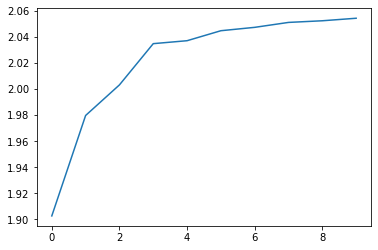

In [65]:
pyplot.plot(m_vals)

In [66]:
(W, S, _) = explainer.explain(data_upper, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [67]:
# Display the prototypes along with their computed weights
inc_prototypes = upper_p.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
759,0,1956,1521,435,399,896,38750,387000,2811,18.9,61.1,35.6,0.0,4.5,1.1,0.0,14.4,0,732,334,120,3728,1260,2221,630,1464,176,0,77.760736,22.239264,20.398773,1.840491,66,81.1,13.763474,67.0,22.333333,23.0,86.636386,0.265477,19.0,71.569189,0.265477,25.0,94.169985,0.265477,0.844547,1.468332,1.738603,36081,Queens,New York,0.70
980,0,4190,1976,2214,839,1245,46038,232800,1593,33.3,3.4,19.3,0.0,50.2,0.0,0.0,13.1,0,1133,358,353,8167,3201,7368,1632,1838,529,0,47.159905,52.840095,20.023866,32.816229,61,66.7,10.552159,38.0,12.666667,8.0,30.134395,0.265477,20.0,75.335988,0.265477,10.0,37.667994,0.265477,0.844547,0.641026,0.759017,36081,Queens,New York,0.15
751,0,2825,2528,297,113,1386,34534,341500,0,12.5,4.1,18.8,0.0,67.8,0.0,5.3,10.3,0,478,77,171,7499,4300,7884,696,1877,105,0,89.486726,10.513274,4.000000,6.513274,67,87.5,32.937047,42.0,14.000000,14.0,52.735192,0.265477,17.0,64.035590,0.265477,11.0,41.434793,0.265477,0.844547,0.553797,0.655733,36081,Queens,New York,0.16


#### Using Prototypes for Clustering

In [68]:
centroids = data_upper[S]

In [69]:
clusters = np.argmin(cdist(data_upper,centroids),1)

In [70]:
upper_p["Cluster"] = clusters

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
for i in range(0,len(centroids)):
    clust = upper_p[upper_p["Cluster"] == i]
    print("For cluster ", i, " there are ", len(clust), " examples")
    print("The mean and standard deviation for these clusters are ",clust["total-evictions"].mean(), " and ", clust["total-evictions"].std(), " respectively")
    print()

For cluster  0  there are  49  examples
The mean and standard deviation for these clusters are  51.204081632653065  and  22.085043573872884  respectively

For cluster  1  there are  3  examples
The mean and standard deviation for these clusters are  49.333333333333336  and  9.865765724632494  respectively

For cluster  2  there are  11  examples
The mean and standard deviation for these clusters are  56.27272727272727  and  64.33053848537396  respectively



#### Examples in Rest of Data Similar to Upper Percentile

In [72]:
data_rest.shape, data_upper.shape

((559, 34), (63, 34))

In [73]:
explainer = ProtodashExplainer()

# call protodash explainer
# S contains indices of the selected prototypes
# W contains importance weights associated with the selected prototypes 
(W, S, m_vals) = explainer.explain(data_rest, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


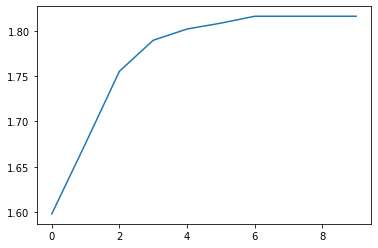

In [74]:
pyplot.plot(m_vals)

In [75]:
(W, S, _) = explainer.explain(data_rest, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [76]:
# Display the prototypes along with their computed weights
inc_prototypes = rest.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
437,0,1495,1228,267,144,1168,35967,483000,1889,67.6,7.1,18.0,0.0,16.3,0.0,4.7,4.3,0,462,121,284,2626,722,3002,487,781,122,8,82.140468,17.859532,9.632107,8.227425,64,32.4,10.097087,13.0,4.333333,5.0,18.833997,0.265477,6.0,22.600796,0.265477,2.0,7.533599,0.265477,0.844547,0.352877,0.417830,36081,Queens,New York,0.46
463,0,1723,1192,531,373,1221,56008,410800,2558,19.0,61.3,18.7,0.0,14.5,0.0,2.0,3.2,0,376,33,172,3476,724,1657,1139,744,134,0,69.181660,30.818340,21.648288,9.170052,69,81.0,14.705882,27.0,9.000000,14.0,52.735192,0.265477,8.0,30.134395,0.265477,5.0,18.833997,0.265477,0.844547,0.755034,0.894010,36081,Queens,New York,0.14
414,0,961,224,737,456,1613,83165,441600,2754,20.6,12.3,22.5,0.0,32.7,0.0,5.4,29.0,0,309,27,80,2647,866,1199,665,812,0,0,23.309053,76.690947,47.450572,29.240375,82,79.4,13.146123,10.0,3.333333,3.0,11.300398,0.265477,4.0,15.067198,0.265477,3.0,11.300398,0.265477,0.844547,1.488095,1.762003,36081,Queens,New York,0.40


## Manhattan

In [77]:
manhattan_df = df_proc[df_proc['county'] == 'Manhattan']

In [78]:
p = 90
p_thresh = np.nanpercentile(manhattan_df['total-evictions'], p)

In [79]:
print(p_thresh)

58.0


In [80]:
upper_p = manhattan_df[manhattan_df['total-evictions'] > p_thresh]
rest = manhattan_df[manhattan_df['total-evictions'] <= p_thresh]
print(len(upper_p), len(rest))

27 247


In [81]:
data = manhattan_df[num_cols].to_numpy()

In [82]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [83]:
data_upper = scaler.transform(upper_p[num_cols].to_numpy())
data_rest = scaler.transform(rest[num_cols].to_numpy())

In [84]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_upper, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


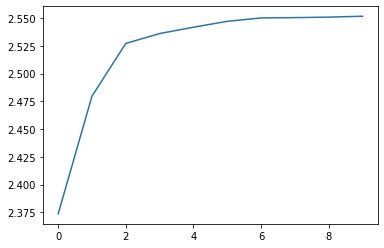

In [85]:
pyplot.plot(m_vals)

In [86]:
(W, S, _) = explainer.explain(data_upper, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [87]:
# Display the prototypes along with their computed weights
inc_prototypes = upper_p.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
314,0,3506,2898,608,90,1127,48382,227700,972,35.2,34.2,45.7,0.9,2.1,0.0,14.5,12.9,0,657,328,448,7619,2375,6725,289,3825,367,0,82.658300,17.341700,2.567028,14.774672,82,64.8,15.087950,63.0,21.000000,27.0,101.703584,0.265477,19.0,71.569189,0.265477,17.0,64.035590,0.265477,0.844547,0.724638,0.858019,36061,Manhattan,New York,0.38
319,0,3488,3199,289,142,1006,27675,727900,2432,30.0,28.2,63.0,0.0,0.0,0.0,3.9,37.9,0,1088,772,388,6021,1926,5837,492,2397,142,0,91.714450,8.285550,4.071101,4.214450,71,70.0,10.326259,64.0,21.333333,11.0,41.434793,0.265477,25.0,94.169985,0.265477,28.0,105.470383,0.265477,0.844547,0.666875,0.789624,36061,Manhattan,New York,0.42
372,0,1892,1860,32,0,1164,51538,0,0,10.7,75.2,9.2,0.3,3.8,1.0,5.5,3.5,0,77,26,300,2785,336,479,106,1478,156,0,98.308668,1.691332,0.000000,1.691332,62,89.3,10.444178,95.0,31.666667,29.0,109.237183,0.265477,22.0,82.869587,0.265477,44.0,165.739174,0.265477,0.844547,1.702509,2.015884,36061,Manhattan,New York,0.20


#### Using Prototypes for Clustering

In [88]:
centroids = data_upper[S]

In [89]:
clusters = np.argmin(cdist(data_upper,centroids),1)

In [90]:
upper_p["Cluster"] = clusters

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
for i in range(0,len(centroids)):
    clust = upper_p[upper_p["Cluster"] == i]
    print("For cluster ", i, " there are ", len(clust), " examples")
    print("The mean and standard deviation for these clusters are ",clust["total-evictions"].mean(), " and ", clust["total-evictions"].std(), " respectively")
    print()

For cluster  0  there are  14  examples
The mean and standard deviation for these clusters are  75.35714285714286  and  16.13218065691222  respectively

For cluster  1  there are  9  examples
The mean and standard deviation for these clusters are  77.0  and  18.887826767524103  respectively

For cluster  2  there are  4  examples
The mean and standard deviation for these clusters are  74.5  and  17.01959654829299  respectively



#### Examples in Rest of Data Similar to Upper Percentile

In [92]:
data_rest.shape, data_upper.shape

((247, 34), (27, 34))

In [93]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_rest, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


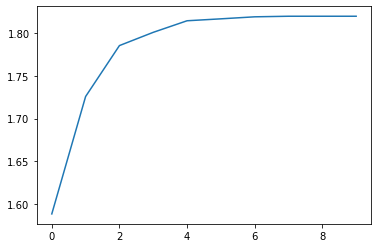

In [94]:
pyplot.plot(m_vals)

In [95]:
(W, S, _) = explainer.explain(data_rest, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [96]:
# Display the prototypes along with their computed weights
inc_prototypes = rest.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
122,0,2257,1567,690,437,2838,121217,783500,3065,81.4,2.3,11.3,0.0,13.5,0.0,2.1,0.6,0,111,18,372,2917,661,1263,57,942,679,19,69.428445,30.571555,19.361985,11.209570,82,18.6,4.825806,10.0,3.333333,3.0,11.300398,0.265477,3.0,11.300398,0.265477,4.0,15.067198,0.265477,0.844547,0.212721,0.251875,36061,Manhattan,New York,0.50
128,0,3965,2148,1817,716,2356,124544,1596200,4001,89.2,2.0,6.5,0.0,8.2,0.0,0.7,0.0,0,831,115,656,6466,814,1915,225,2722,548,53,54.174023,45.825977,18.058008,27.767970,82,10.8,0.990826,11.0,3.666667,6.0,22.600796,0.265477,4.0,15.067198,0.265477,1.0,3.766799,0.265477,0.844547,0.170701,0.202122,36061,Manhattan,New York,0.18
123,0,978,973,5,0,628,21102,0,0,28.2,10.6,32.2,0.0,44.8,0.0,0.0,16.4,0,169,43,87,1933,366,1922,92,500,87,0,99.488753,0.511247,0.000000,0.511247,65,71.8,8.314607,9.0,3.000000,4.0,15.067198,0.265477,4.0,15.067198,0.265477,1.0,3.766799,0.265477,0.844547,0.308325,0.365077,36061,Manhattan,New York,0.32


## Staten Island

In [97]:
staten_df = df_proc[df_proc['county'] == 'Staten Island']

In [98]:
p = 90
p_thresh = np.nanpercentile(staten_df['total-evictions'], p)

In [99]:
print(p_thresh)

36.5


In [100]:
upper_p = staten_df[staten_df['total-evictions'] > p_thresh]
rest = staten_df[staten_df['total-evictions'] <= p_thresh]
print(len(upper_p), len(rest))

11 95


In [101]:
# convert pandas dataframe to numpy
data = staten_df[num_cols].to_numpy()

In [102]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [103]:
data_upper = scaler.transform(upper_p[num_cols].to_numpy())
data_rest = scaler.transform(rest[num_cols].to_numpy())

In [104]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_upper, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


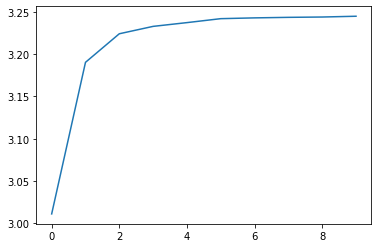

In [105]:
pyplot.plot(m_vals)

In [106]:
(W, S, _) = explainer.explain(data_upper, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [107]:
# Display the prototypes along with their computed weights
inc_prototypes = upper_p.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
12,0,1825,1023,802,617,1142,31040,337600,2298,52.0,31.5,52.1,0.0,3.2,0.0,2.1,11.2,0,730,321,207,3510,1213,2966,769,810,183,0,56.054795,43.945205,33.808219,10.136986,82,48.0,20.025234,53.0,17.666667,20.0,48.813559,0.409722,17.0,41.491525,0.409722,16.0,39.050847,0.409722,0.844547,1.726947,2.044820,36085,Staten Island,New York,0.37
57,0,1155,706,449,313,1154,45337,313300,2230,27.7,57.9,15.8,0.0,1.7,0.0,4.5,8.1,0,430,214,102,2020,309,665,493,610,292,0,61.125541,38.874459,27.099567,11.774892,82,72.3,9.451796,64.0,21.333333,22.0,38.000000,0.578947,26.0,44.909091,0.578947,16.0,27.636364,0.578947,0.844547,3.021719,3.577915,36085,Staten Island,New York,0.48
92,0,4202,2430,1772,1355,827,40971,347100,2027,28.9,46.5,35.1,1.1,10.1,0.0,4.5,8.8,0,1608,768,346,7378,1556,4593,2092,1937,394,0,57.829605,42.170395,32.246549,9.923846,51,71.1,10.680713,174.0,58.000000,51.0,127.325342,0.400549,72.0,179.753425,0.400549,51.0,127.325342,0.400549,0.844547,2.386831,2.826167,36085,Staten Island,New York,0.15


#### Using Prototypes for Clustering

In [108]:
centroids = data_upper[S]

In [109]:
clusters = np.argmin(cdist(data_upper,centroids),1)

In [110]:
upper_p["Cluster"] = clusters

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
for i in range(0,len(centroids)):
    clust = upper_p[upper_p["Cluster"] == i]
    print("For cluster ", i, " there are ", len(clust), " examples")
    print("The mean and standard deviation for these clusters are ",clust["total-evictions"].mean(), " and ", clust["total-evictions"].std(), " respectively")
    print()

For cluster  0  there are  3  examples
The mean and standard deviation for these clusters are  69.0  and  17.69180601295413  respectively

For cluster  1  there are  7  examples
The mean and standard deviation for these clusters are  57.0  and  21.236760581595302  respectively

For cluster  2  there are  1  examples
The mean and standard deviation for these clusters are  174.0  and  nan  respectively



#### Examples in Rest of Data Similar to Upper Percentile

In [112]:
data_rest.shape, data_upper.shape

((95, 34), (11, 34))

In [113]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_rest, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


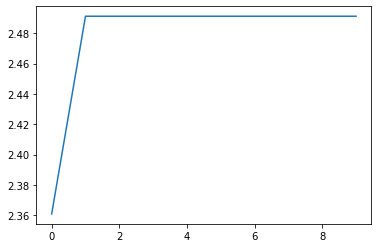

In [114]:
pyplot.plot(m_vals)

This time only 1 example is required as a prototype, this is likely due to the small number of samples within Staten Island.

In [115]:
(W, S, _) = explainer.explain(data_rest, data_upper, m=1)

In [116]:
# Display the prototypes along with their computed weights
inc_prototypes = rest.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
11,0,1601,297,1304,910,1182,100181,628800,2876,97.4,0.4,7.5,0.0,1.1,0.0,0.0,1.1,0,570,108,33,3132,105,753,1412,266,94,0,18.550906,81.449094,56.839475,24.609619,42,2.6,2.474591,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.844547,0.3367,0.398676,36085,Staten Island,New York,1.0


## All Boroughs

Finally, we can repeat the process for the entire dataset to see how that varies.

In [117]:
p = 90
p_thresh = np.nanpercentile(df_proc['total-evictions'], p)

In [118]:
print(p_thresh)

64.0


In [119]:
upper_p = df_proc[df_proc['total-evictions'] > p_thresh]
rest = df_proc[df_proc['total-evictions'] <= p_thresh]
print(len(upper_p), len(rest))

206 1860


In [120]:
data = df_proc[num_cols].to_numpy()

In [121]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [122]:
data_upper = scaler.transform(upper_p[num_cols].to_numpy())
data_rest = scaler.transform(rest[num_cols].to_numpy())

In [123]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_upper, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


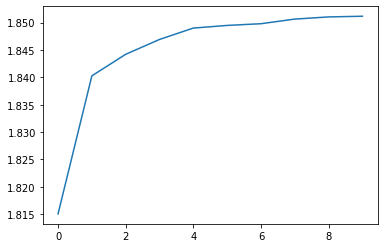

In [124]:
pyplot.plot(m_vals)

In [125]:
(W, S, _) = explainer.explain(data_upper, data_upper, m=4)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [126]:
# Display the prototypes along with their computed weights
inc_prototypes = upper_p.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
1884,0,1865,1485,380,215,996,32072,331600,2043,17.9,39.5,56.0,0.6,0.0,0.0,2.7,39.4,0,798,414,181,3337,1127,3482,430,1282,182,0,79.624665,20.375335,11.528150,8.847185,81,82.1,14.897709,99.0,33.000000,34.0,102.596491,0.331395,43.0,129.754386,0.331395,22.0,66.385965,0.331395,0.844547,2.222222,2.631259,36005,Bronx,New York,0.62
372,0,1892,1860,32,0,1164,51538,0,0,10.7,75.2,9.2,0.3,3.8,1.0,5.5,3.5,0,77,26,300,2785,336,479,106,1478,156,0,98.308668,1.691332,0.000000,1.691332,62,89.3,10.444178,95.0,31.666667,29.0,109.237183,0.265477,22.0,82.869587,0.265477,44.0,165.739174,0.265477,0.844547,1.702509,2.015884,36061,Manhattan,New York,0.22
334,0,3700,3625,75,62,1074,31960,471100,3016,26.7,13.5,86.1,2.8,2.1,0.0,8.8,46.1,0,1040,464,444,9259,4154,11115,326,3910,177,0,97.972973,2.027027,1.675676,0.351351,82,73.3,18.136674,103.0,34.333333,47.0,177.039572,0.265477,36.0,135.604779,0.265477,20.0,75.335988,0.265477,0.844547,0.947126,1.121461,36061,Manhattan,New York,0.08
1451,0,2176,1731,445,408,1240,44930,572000,2717,6.3,84.3,17.6,0.0,0.3,0.0,1.1,8.0,0,820,495,62,3803,912,1375,792,1495,190,0,79.549632,20.450368,18.750000,1.700368,21,93.7,4.929697,116.0,38.666667,38.0,182.875000,0.207792,31.0,149.187500,0.207792,47.0,226.187500,0.207792,0.844547,2.233776,2.644939,36047,Brooklyn,New York,0.08


#### Using Prototypes for Clustering

In [127]:
centroids = data_upper[S]

In [128]:
clusters = np.argmin(cdist(data_upper,centroids),1)

In [129]:
upper_p["Cluster"] = clusters

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
for i in range(0,len(centroids)):
    clust = upper_p[upper_p["Cluster"] == i]
    print("For cluster ", i, " there are ", len(clust), " examples")
    print("The mean and standard deviation for these clusters are ",clust["total-evictions"].mean(), " and ", clust["total-evictions"].std(), " respectively")
    print()

For cluster  0  there are  150  examples
The mean and standard deviation for these clusters are  99.63333333333334  and  32.74682558859338  respectively

For cluster  1  there are  16  examples
The mean and standard deviation for these clusters are  93.25  and  24.804569471503967  respectively

For cluster  2  there are  5  examples
The mean and standard deviation for these clusters are  98.2  and  11.945710527214361  respectively

For cluster  3  there are  35  examples
The mean and standard deviation for these clusters are  89.02857142857142  and  23.516559515128304  respectively



#### Examples in Rest of Data Similar to Upper Percentile

In [131]:
data_rest.shape, data_upper.shape

((1860, 34), (206, 34))

In [132]:
explainer = ProtodashExplainer()
(W, S, m_vals) = explainer.explain(data_rest, data_upper, m=10)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


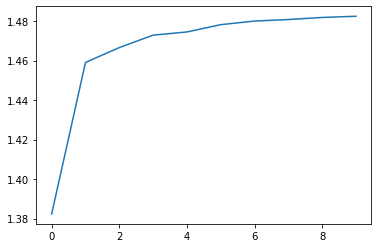

In [133]:
pyplot.plot(m_vals)

In [134]:
(W, S, _) = explainer.explain(data_rest, data_upper, m=3)

/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/staceyro/anaconda/envs/datadive/lib/python3.7/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


In [135]:
# Display the prototypes along with their computed weights
inc_prototypes = rest.iloc[S, :].copy()
# Compute normalized importance weights for prototypes
inc_prototypes["Weights of Prototypes"] = np.around(W/np.sum(W), 2) 
inc_prototypes

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,overall-city-eviction-rate,avg-eviction-rate,ratio-to-mean-eviction-rate,county_GEOID,county,state,Weights of Prototypes
32,0,1311,515,796,525,1253,80184,476300,2393,85.9,1.7,8.9,0.0,7.9,0.0,0.0,4.6,0,395,22,107,2603,329,1315,805,595,170,24,39.282990,60.717010,40.045767,20.671243,61,14.1,6.886490,9.0,3.000000,4.0,9.000000,0.444444,4.0,9.000000,0.444444,1.0,2.250000,0.444444,0.844547,0.582524,0.689747,36085,Staten Island,New York,0.66
63,0,2801,566,2235,1994,1302,101065,504700,2677,84.9,1.7,15.5,0.0,5.9,0.0,1.0,6.4,0,1242,79,207,6044,672,2881,3011,864,125,0,20.207069,79.792931,71.188861,8.604070,24,15.1,6.156946,18.0,6.000000,7.0,10.937500,0.640000,4.0,6.250000,0.640000,7.0,10.937500,0.640000,0.844547,1.060071,1.255194,36085,Staten Island,New York,0.24
129,0,4215,3779,436,234,1095,52823,0,4001,61.1,15.4,28.5,0.6,17.2,0.0,0.4,5.2,0,644,132,670,5917,1302,4401,148,2447,834,0,89.655991,10.344009,5.551601,4.792408,29,38.9,6.782088,47.0,15.666667,15.0,56.501991,0.265477,16.0,60.268791,0.265477,16.0,60.268791,0.265477,0.844547,0.414572,0.490880,36061,Manhattan,New York,0.11
